In [171]:
import os
import sys

root_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
model_dir = os.path.join(root_dir, "model")
sys.path.append(root_dir)
sys.path.append(model_dir)

import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hoho_utils


plt.style.use('ggplot')

In [172]:
def suffix_time():
    current_time = time.time()
    local_time = time.localtime(current_time)
    time_str = time.strftime('%Y%m%d%H%M%S', local_time)
    return time_str

In [173]:
suffix = suffix_time()
suffix

'20230919000140'

### 加载走子数据

In [174]:
data_dir = "../output/data"
file_list = os.listdir(data_dir)
file_count = len(file_list)
item_list = list()

print(f"file_count: {file_count}")

for i, filename in enumerate(file_list):
    file_path = os.path.join(data_dir, filename)
    with open(file_path, "r") as file:
        json_str = file.read()
        matches = json.loads(json_str)
        match_count = len(matches)

        for j, match in enumerate(matches):
            base_id =  int(time.time() * 1000) + j
            for k, round in enumerate(match):
                match_id = f"{i}-{j}"
                round_id = f"{base_id}-{k}"
                state = round[0]
                action = round[2]
                next_state = round[3]
                raw_reward = round[4]
                done = round[5]
                chapture_list = round[6]
                chaptures = ','.join(chapture_list)
                chapture_reward = round[7]
                re_reward = round[8]

                round_dict = {"match_id": match_id,
                              "round_id": round_id,
                              "state": state,
                              "action":action,
                              "next_state": next_state,
                              "done": done,
                              "chaptures": chaptures,
                              "chapture_reward": chapture_reward,
                              "raw_reward": raw_reward,
                              "re_reward": re_reward}
                item_list.append(round_dict)

                if done:
                    break

file_count: 55


In [175]:
data = pd.DataFrame(item_list)

In [176]:
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,raw_reward,re_reward
0,0-0,1695052901462-0,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,h0i2,RNBAKAB1R/9/1C5CN/P1P1P1P1P/9/9/p1p1p1p1p/1c2c...,False,,0.00,0,-1.8100
1,0-0,1695052901462-1,RNBAKAB1R/9/1C5CN/P1P1P1P1P/9/9/p1p1p1p1p/1c2c...,b2e2,RNBAKAB1R/9/4C2CN/P1P1P1P1P/9/9/p1p1p1p1p/1c2c...,False,,0.00,0,-1.9000
2,0-0,1695052901462-2,RNBAKAB1R/9/4C2CN/P1P1P1P1P/9/9/p1p1p1p1p/1c2c...,e0e1,RNBA1AB1R/4K4/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c...,False,P,-1.00,0,-3.7549
3,0-0,1695052901462-3,RNBA1AB1R/4K4/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c...,e1e0,RNBAKAB1R/9/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c4n...,False,,0.00,0,-3.9610
4,0-0,1695052901462-4,RNBAKAB1R/9/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c4n...,g3g4,RNBAKAB1R/9/4C2rN/P1P1c3P/6P2/9/p1p1p1p1p/1c4n...,False,C,-2.29,0,-84.8710
...,...,...,...,...,...,...,...,...,...,...
4166,54-6,1695052902961-2,RNBAKAB1R/9/4C2CN/P1P1P1P1P/9/9/p1p1p1p1p/1c2c...,e0e1,RNBA1AB1R/4K4/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c...,False,P,-1.00,0,-3.7549
4167,54-6,1695052902961-3,RNBA1AB1R/4K4/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c...,e1e0,RNBAKAB1R/9/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c4n...,False,,0.00,0,-3.9610
4168,54-6,1695052902961-4,RNBAKAB1R/9/4C2CN/P1P1c1P1P/9/9/p1p1p1p1p/1c4n...,g3g4,RNBAKAB1R/9/4C2rN/P1P1c3P/6P2/9/p1p1p1p1p/1c4n...,False,C,-2.29,0,-84.8710
4169,54-6,1695052902961-5,RNBAKAB1R/9/4C2rN/P1P1c3P/6P2/9/p1p1p1p1p/1c4n...,e0e1,RNBA1AB1R/4K2r1/4C3N/P1P1c3P/6P2/9/p1p1p1p1p/1...,False,,0.00,0,-93.0610


In [177]:
data.to_excel(f"./outputs/hoho_chess_data_{suffix}.xlsx", index = False)

### 看看随着模型不断学习升级，累积奖励的趋势

In [178]:
data_group = data.groupby(["match_id"], as_index = False).agg({"re_reward": sum, "chapture_reward": sum})
data_group

,match_id,re_reward,chapture_reward
0,0-0,-282.2128,-103.29
1,0-1,-331.0256,-111.58
2,0-10,-294.8056,-106.58
3,0-2,-326.8335,-112.87
4,0-3,-282.2128,-103.29
...,...,...,...
485,9-5,-282.2128,-103.29
486,9-6,-283.2128,-103.29
487,9-7,-282.2128,-103.29
488,9-8,-282.2128,-103.29


In [179]:
data_group["model_version"] = data_group["match_id"].apply(lambda x: x.split("-")[0]).astype(int)
data_group

,match_id,re_reward,chapture_reward,model_version
0,0-0,-282.2128,-103.29,0
1,0-1,-331.0256,-111.58,0
2,0-10,-294.8056,-106.58,0
3,0-2,-326.8335,-112.87,0
4,0-3,-282.2128,-103.29,0
...,...,...,...,...
485,9-5,-282.2128,-103.29,9
486,9-6,-283.2128,-103.29,9
487,9-7,-282.2128,-103.29,9
488,9-8,-282.2128,-103.29,9


In [180]:
data_group_sorted = data_group.sort_values(by = "model_version").reset_index()
data_group_sorted

,index,match_id,re_reward,chapture_reward,model_version
0,0,0-0,-282.2128,-103.29,0
1,1,0-1,-331.0256,-111.58,0
2,2,0-10,-294.8056,-106.58,0
3,3,0-2,-326.8335,-112.87,0
4,4,0-3,-282.2128,-103.29,0
...,...,...,...,...,...
485,432,54-2,-282.2128,-103.29,54
486,431,54-1,-321.8707,-112.58,54
487,430,54-0,-282.2128,-103.29,54
488,436,54-6,-282.2128,-103.29,54


In [181]:
data_group_sorted["match_index"] = data_group_sorted["match_id"].apply(lambda x: x.split("-")[-1]).astype(int)

In [182]:
data_group_sorted

,index,match_id,re_reward,chapture_reward,model_version,match_index
0,0,0-0,-282.2128,-103.29,0,0
1,1,0-1,-331.0256,-111.58,0,1
2,2,0-10,-294.8056,-106.58,0,10
3,3,0-2,-326.8335,-112.87,0,2
4,4,0-3,-282.2128,-103.29,0,3
...,...,...,...,...,...,...
485,432,54-2,-282.2128,-103.29,54,2
486,431,54-1,-321.8707,-112.58,54,1
487,430,54-0,-282.2128,-103.29,54,0
488,436,54-6,-282.2128,-103.29,54,6


In [183]:
data_group_sorted2 = data_group_sorted.groupby("model_version").apply(lambda x: x.sort_values(by = "match_index"))
data_group_sorted3 = data_group_sorted2.reset_index(drop = True)

In [184]:
data_group_sorted3

,index,match_id,re_reward,chapture_reward,model_version,match_index
0,0,0-0,-282.2128,-103.29,0,0
1,1,0-1,-331.0256,-111.58,0,1
2,3,0-2,-326.8335,-112.87,0,2
3,4,0-3,-282.2128,-103.29,0,3
4,5,0-4,-356.6905,-118.58,0,4
...,...,...,...,...,...,...
485,432,54-2,-282.2128,-103.29,54,2
486,433,54-3,-307.0656,-108.58,54,3
487,434,54-4,-282.2128,-103.29,54,4
488,435,54-5,-293.3628,-106.29,54,5


In [185]:
data_group_sorted3.to_excel(f"./outputs/hoho_qlearning_total_rewards_data_by_match_{suffix}.xlsx", index = False)

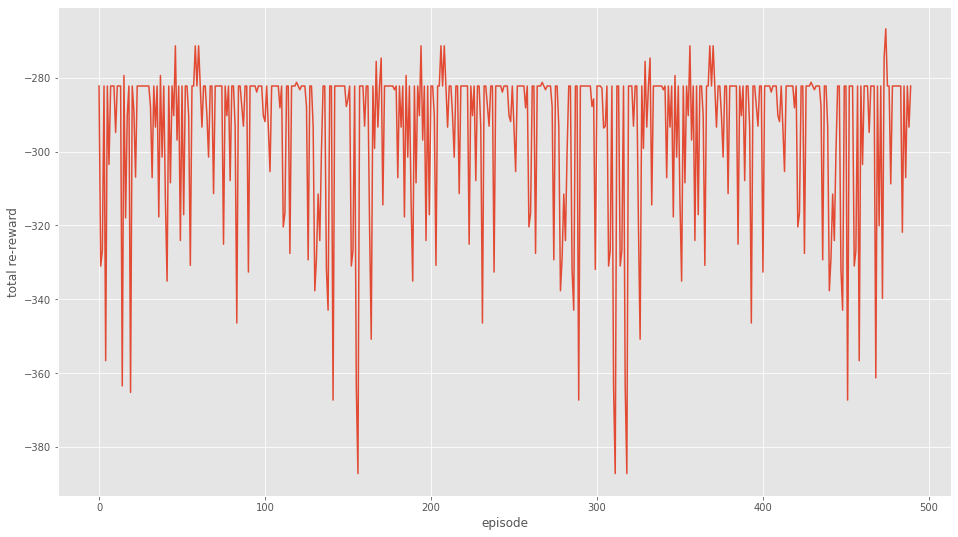

In [191]:
x = range(data_group_sorted3["re_reward"].values.shape[0])
y = data_group_sorted3["re_reward"].values
plt.figure(figsize = (16, 9))
plt.plot(x, y)
plt.xlabel("episode")
plt.ylabel("total re-reward")
plt.show()

In [187]:
data_group_sorted4 = data_group_sorted3.groupby("model_version").agg({"re_reward": sum, "chapture_reward": sum, "match_index": "count"}).reset_index()
data_group_sorted4.rename(columns = {"match_index": "match_count"}, inplace = True)
data_group_sorted4["average_chapture_reward"] = data_group_sorted4["chapture_reward"] / data_group_sorted4["match_count"]
data_group_sorted4["average_re_reward"] = data_group_sorted4["re_reward"] / data_group_sorted4["match_count"]
data_group_sorted4

,model_version,re_reward,chapture_reward,match_count,average_chapture_reward,average_re_reward
0,0,-3306.1248,-1176.64,11,-106.967273,-300.556800
1,1,-3027.4443,-1076.06,10,-107.606000,-302.744430
2,2,-4306.1250,-1570.64,15,-104.709333,-287.075000
3,3,-3842.8129,-1380.93,13,-106.225385,-295.600992
4,4,-3498.1936,-1263.48,12,-105.290000,-291.516133
5,5,-4343.7127,-1573.93,15,-104.928667,-289.580847
6,6,-3794.2299,-1373.64,13,-105.664615,-291.863838
7,7,-3738.5443,-1358.06,13,-104.466154,-287.580331
8,8,-3781.6645,-1364.93,13,-104.994615,-290.897269
9,9,-4049.0592,-1469.06,14,-104.932857,-289.218514


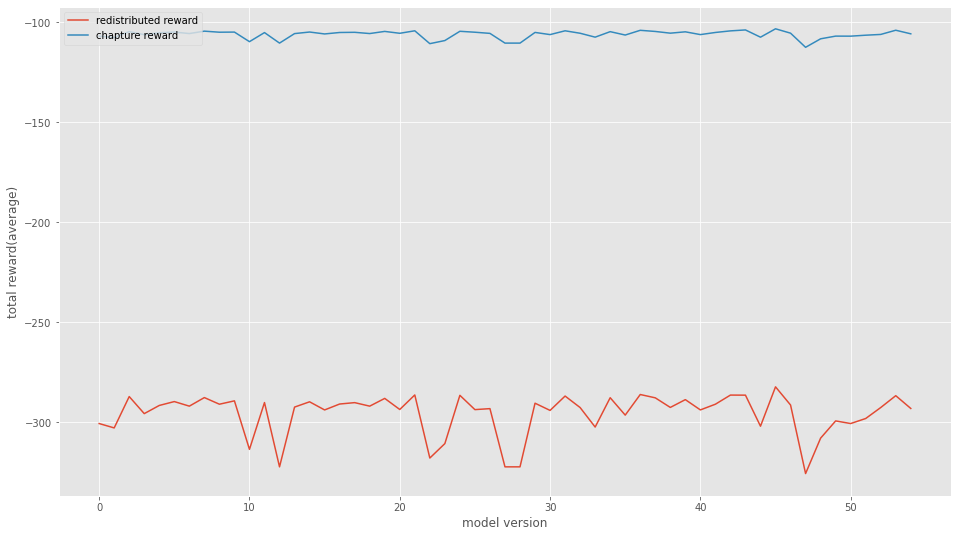

In [189]:
x = range(data_group_sorted4["model_version"].values.shape[0])
y1 = data_group_sorted4["average_re_reward"].values
y2 = data_group_sorted4["average_chapture_reward"].values
plt.figure(figsize = (16, 9))
plt.plot(x, y1, label = "redistributed reward")
plt.plot(x, y2, label = "chapture reward")
plt.legend(loc = "upper left")
plt.xlabel("model version")
plt.ylabel("total reward(average)")
plt.show()

### 分配奖励到指定棋局(Double DQN Learning)

In [162]:
data[data["match_id"] == "0-0"][["action", "done", "chaptures", "chapture_reward", "raw_reward", "re_reward"]]

,action,done,chaptures,chapture_reward,raw_reward,re_reward
0,h0i2,False,,0.00,0,-1.8100
1,b2e2,False,,0.00,0,-1.9000
2,e0e1,False,P,-1.00,0,-3.7549
3,e1e0,False,,0.00,0,-3.9610
4,g3g4,False,C,-2.29,0,-84.8710
5,e0e1,False,,0.00,0,-93.0610
6,g4g5,True,K,-100.00,-1,-92.8549


In [170]:
data[data["match_id"] == "10-8"][["action", "done", "chaptures", "chapture_reward", "raw_reward", "re_reward"]]

,action,done,chaptures,chapture_reward,raw_reward,re_reward
1117,h0i2,False,,0.00,0,-1.8100
1118,b2e2,False,,0.00,0,-1.9000
1119,e0e1,False,P,-1.00,0,-3.7549
1120,a3a4,False,,0.00,0,-5.5810
1121,e1e0,False,C,-2.29,0,-9.1459
1122,a0a1,False,N,-2.00,0,-8.7220
1123,i3i4,False,R,-4.29,0,-11.9908
1124,a1f1,False,,0.00,0,-10.3420
1125,f1a1,False,R,-4.29,0,-89.3359
1126,e2a2,False,,0.00,0,-94.8610


### 分配奖励到指定棋局(LSTM-Attention)

In [5]:
file_path = "./outputs/hoho_chess_data_20230905213354.xlsx"
chess_data = pd.read_excel(file_path)

In [6]:
contribution_file = "./outputs/hoho_action_contribution_maxstep15_win-lose-1_20230905213354.xlsx"
contribution_data = pd.read_excel(contribution_file)
contribution_data

,action_type,contribution
0,a0b0,0.065608
1,a0c0,0.061905
2,a0d0,0.000000
3,a0e0,0.000000
4,a0f0,0.000000
...,...,...
2081,e7c9,0.000000
2082,e7g5,0.000000
2083,g5e7,0.000000
2084,g9i7,0.000000


In [67]:
win = -1 # 赢为1，输为-1
hoho_match_data = chess_data[chess_data["match_id"] == "82-7"].copy()  # 随便选一场输的看看
actions_list = hoho_match_data["action"].values
hoho_match_contribution_data = contribution_data[contribution_data["action_type"].isin(actions_list)].copy()
total_contribution = hoho_match_contribution_data["contribution"].sum()
hoho_match_contribution_data["mine"] = hoho_match_contribution_data["contribution"].apply(lambda c: c / total_contribution * (len(hoho_match_contribution_data) * win))
hoho_match_contribution_data["alphago_zero"] = len(hoho_match_contribution_data) * [win]

In [68]:
hoho_match_contribution_data2 = hoho_match_contribution_data.rename(columns = {"action_type": "action"})

In [69]:
hoho_match_contribution_data2

,action,contribution,mine,alphago_zero
0,a0b0,0.065608,-1.088780,-1
8,a0a1,0.066551,-1.104414,-1
20,a1c1,0.065753,-1.091186,-1
204,b0a0,0.063889,-1.060244,-1
212,b0b1,0.055556,-0.921951,-1
223,b0c2,0.066449,-1.102728,-1
226,b1d1,0.044444,-0.737561,-1
253,b2b0,0.062500,-1.037195,-1
693,d1d3,0.044444,-0.737561,-1
904,e0f0,0.065432,-1.085853,-1


In [70]:
match_data_merge = pd.merge(hoho_match_data, hoho_match_contribution_data2, on = "action", how = "left")

In [71]:
match_data_merge

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,contribution,mine,alphago_zero
0,82-7,16939208404300,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,b0c2,R1BAKABNR/9/1CN4C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5...,0,NaN,0.00,0,0,82-7_16939208404300,0.066449,-1.102728,-1
1,82-7,16939208404301,R1BAKABNR/9/1CN4C1/P1P1P1P1P/9/9/p1p1p1p1p/1c2...,h2h8,R1BAKABNR/9/1CN6/P1P1P1P1P/9/9/p1p1p1p1p/1c2c4...,0,NaN,0.00,0,0,82-7_16939208404301,0.063492,-1.053659,-1
2,82-7,16939208404302,R1BAKABNR/9/1CN6/P1P1P1P1P/9/9/p1p1p1p1p/1c2c4...,b2b0,RCBAKABNR/9/2N6/P1P1P1P1P/9/9/p1p1p1p1p/1c2c4/...,0,C,-25.41,0,0,82-7_16939208404302,0.062500,-1.037195,-1
3,82-7,16939208404303,RCBAKABNR/9/2N6/P1P1P1P1P/9/9/p1p1p1p1p/1c2c4/...,c0a2,RC1AKABNR/9/B1N6/P1P1P1P1P/9/9/p1p1p1p1p/1c2c4...,0,NaN,0.00,0,0,82-7_16939208404303,0.066516,-1.103845,-1
4,82-7,16939208404304,RC1AKABNR/7r1/B1N6/P1P1P1P1P/9/9/p1p1p1p1p/1c2...,a0a1,1C1AKABNR/R6r1/B1N6/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,NaN,0.00,0,0,82-7_16939208404304,0.066551,-1.104414,-1
5,82-7,16939208404305,1C1AKABNR/Rc5r1/B1N6/P1P1P1P1P/9/9/p1p1p1p1p/4...,f0e1,1C1AK1BNR/Rc2A2r1/B1N6/P1P1P1P1P/9/9/p1p1p1p1p...,0,NaN,0.00,0,0,82-7_16939208404305,0.066664,-1.106300,-1
6,82-7,16939208404306,1C1AK1BNR/R3A2r1/B1N6/PcP1P1P1P/9/9/p1p1p1p1p/...,i3i4,1C1AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/...,0,NaN,0.00,0,0,82-7_16939208404306,0.066502,-1.103602,-1
7,82-7,16939208404307,1C1AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/...,b0a0,C2AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/2...,0,NaN,0.00,0,0,82-7_16939208404307,0.063889,-1.060244,-1
8,82-7,16939208404308,C2AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/2...,a0b0,1C1AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/...,0,NaN,0.00,0,0,82-7_16939208404308,0.065608,-1.088780,-1
9,82-7,16939208404309,1C1AK1BNR/R3A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/...,b0b1,3AK1BNR/RC2A2r1/B1N6/PcP1P1P2/8P/9/p1p1p1p1p/2...,0,NaN,0.00,0,0,82-7_16939208404309,0.055556,-0.921951,-1


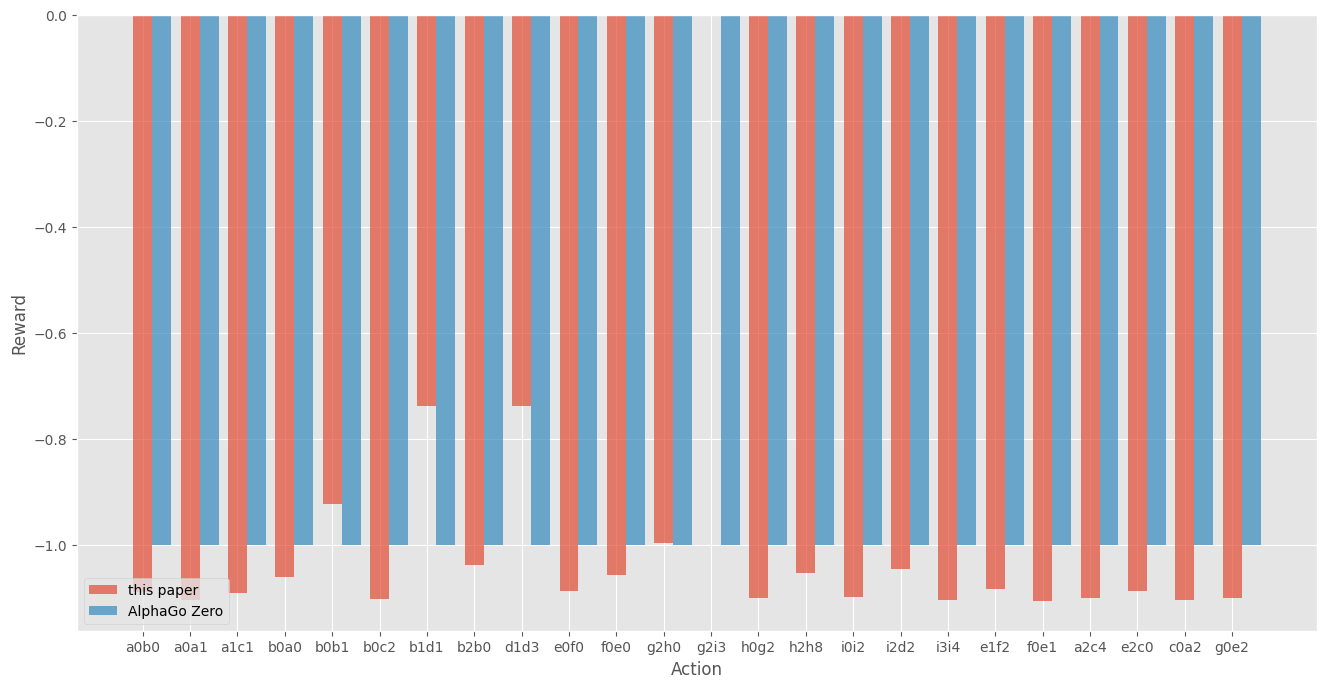

In [72]:
custom_ticks = list(range(len(hoho_match_contribution_data)))
custom_labels = hoho_match_contribution_data2["action"].values.tolist()
plt.figure(figsize = (16, 8))
plt.bar(range(len(hoho_match_contribution_data)), hoho_match_contribution_data["mine"], width=0.4, alpha=0.7, label='this paper' )
plt.bar([i + 0.4 for i in range(len(hoho_match_contribution_data))], hoho_match_contribution_data["alphago_zero"], width=0.4, alpha=0.7, label='AlphaGo Zero'  )
plt.xticks(custom_ticks, custom_labels)
plt.xlabel('Action')
plt.ylabel('Reward')
plt.legend(loc='lower left')
plt.show()